<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Data-Science/blob/main/IBMDataScienceCapstoneToronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEB SCRAPING

###IMPORT Libraries

In [ ]:
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

###GET Request

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


###PARSING

In [ ]:
soup = BeautifulSoup(r.text, 'html.parser')
data = soup.find_all('table')[0]
#data

###TEXT EXTRACTION

In [ ]:
PostalCode = []
Borough = []
Neighborhood = []

#data.find_all('tr')[0].find_all('th')[0].text.strip() #PostalCode
#data.find_all('tr')[0].find_all('th')[1].text.strip() #Borough
#data.find_all('tr')[0].find_all('th')[2].text.strip() #Neighborhood

for i in tqdm(range(1, len(data.find_all('tr')))):
  PostalCode.append(data.find_all('tr')[i].find_all('td')[0].text.strip())
  Borough.append(data.find_all('tr')[i].find_all('td')[1].text.strip())
  Neighborhood.append(data.find_all('tr')[i].find_all('td')[2].text.strip())

100%|██████████| 180/180 [00:00<00:00, 417.53it/s]


#DATAFRAME: Pre-Processing

In [ ]:
import pandas as pd

data = pd.DataFrame({'Postal Code':PostalCode,
                     'Borough':Borough,
                     'Neighborhood': Neighborhood})#, index = PostalCode)

In [ ]:
print(data.shape)
data.head()

(180, 3)


,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [ ]:
data = data.sort_values(by = ['Postal Code'])
data.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
9,M1B,Scarborough,"Malvern, Rouge"
18,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
27,M1E,Scarborough,"Guildwood, Morningside, West Hill"
36,M1G,Scarborough,Woburn


###COURSERA Condition : Ignore cells with a borough that is Not assigned

In [ ]:
data = data[data['Borough'] != 'Not assigned']
print(data.shape)
data.head()

(103, 3)


,Postal Code,Borough,Neighborhood
9,M1B,Scarborough,"Malvern, Rouge"
18,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
27,M1E,Scarborough,"Guildwood, Morningside, West Hill"
36,M1G,Scarborough,Woburn
45,M1H,Scarborough,Cedarbrae


###CO-ORDINATES CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
path = '/content/drive/My Drive/Geospatial_Coordinates.csv'
coordinates = pd.read_csv(path)
coordinates = coordinates.sort_values(by = ['Postal Code'])
#coordinates.head()

In [ ]:
data = pd.merge(data, coordinates, on="Postal Code")
data.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


###DATA Description

In [ ]:
data.to_csv('Toronto.csv')
!cp Toronto.csv "drive/My Drive/Coursera/IBM"

In [ ]:
data.describe()

,Latitude,Longitude
count,103.000000,103.000000
mean,43.704608,-79.397153
std,0.052463,0.097146
min,43.602414,-79.615819
25%,43.660567,-79.464763
50%,43.696948,-79.388790
75%,43.745320,-79.340923
max,43.836125,-79.160497


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postal Code   103 non-null    object 
 1   Borough       103 non-null    object 
 2   Neighborhood  103 non-null    object 
 3   Latitude      103 non-null    float64
 4   Longitude     103 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


###"NA" Value Check


In [ ]:
data.isna().sum()

Postal Code     0
Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

###"NULL" Value Check

In [ ]:
data.isnull().sum()

Postal Code     0
Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

###Value Count of FEATURES

In [ ]:
print(data['Postal Code'].value_counts(), "\n")
print(data['Borough'].value_counts(), "\n")
print(data['Neighborhood'].value_counts(), "\n")

M1R    1
M9R    1
M2L    1
M1J    1
M4P    1
      ..
M1V    1
M4V    1
M1X    1
M1B    1
M2N    1
Name: Postal Code, Length: 103, dtype: int64 

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64 

Downsview                         4
Don Mills                         2
Runnymede, The Junction North     1
Willowdale, Willowdale West       1
Commerce Court, Victoria Hotel    1
                                 ..
St. James Town                    1
Steeles West, L'Amoreaux West     1
Woburn                            1
The Beaches                       1
Thorncliffe Park                  1
Name: Neighborhood, Length: 99, dtype: int64 



##Combining a row with the neighborhoods

In [ ]:
X = data.drop(['Latitude',	'Longitude'], axis = 1)
X.shape

(103, 3)

In [ ]:
X = X.groupby(by = 'Postal Code', as_index = False)
X.first()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [ ]:
print("DataFrame Shape: ", X.first().shape)

DataFrame Shape:  (103, 3)


In [ ]:
data.groupby('Borough').count()

,Postal Code,Neighborhood,Latitude,Longitude
Borough,,,,
Central Toronto,9,9,9,9
Downtown Toronto,19,19,19,19
East Toronto,5,5,5,5
East York,5,5,5,5
Etobicoke,12,12,12,12
Mississauga,1,1,1,1
North York,24,24,24,24
Scarborough,17,17,17,17
West Toronto,6,6,6,6


###VISUALIZATION

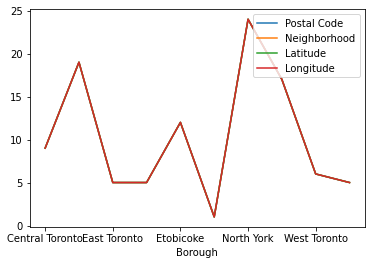

In [ ]:
data.groupby('Borough').count().plot()

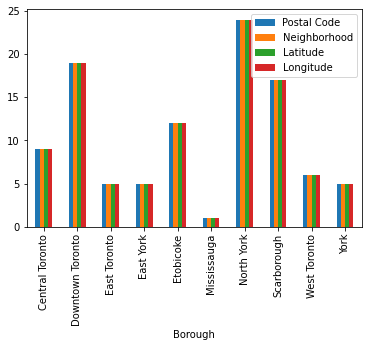

In [ ]:
data.groupby('Borough').count().plot.bar()

###NEIGHBORHOODS

In [ ]:
data.groupby('Neighborhood').count()

,Postal Code,Borough,Latitude,Longitude
Neighborhood,,,,
Agincourt,1,1,1,1
"Alderwood, Long Branch",1,1,1,1
"Bathurst Manor, Wilson Heights, Downsview North",1,1,1,1
Bayview Village,1,1,1,1
"Bedford Park, Lawrence Manor East",1,1,1,1
...,...,...,...,...
"Willowdale, Willowdale West",1,1,1,1
Woburn,1,1,1,1
Woodbine Heights,1,1,1,1


In [ ]:
print('There are {} uniques Neighborhood.'.format(len(data['Neighborhood'].unique())))
print('There are {} uniques Borough.'.format(len(data['Borough'].unique())))

There are 99 uniques Neighborhood.
There are 10 uniques Borough.


#Segmenting and Clustering Neighborhoods in TORONTO

> IMPORT LIBRARIES

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
#from pandas.io.json import json_normalize
from pandas import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Folium installed
Libraries imported.


In [ ]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
#from pandas.io.json import json_normalize
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [ ]:
#!pip install pandas==1.0.3
#import pandas as pd

In [ ]:
"""!wget -q -O 'toronto_data.json' https://cocl.us/toronto
print('Data downloaded!')

with open('toronto_data.json') as json_data:
    toronto_data = json.load(json_data)"""

"!wget -q -O 'toronto_data.json' https://cocl.us/toronto\nprint('Data downloaded!')\n\nwith open('toronto_data.json') as json_data:\n    toronto_data = json.load(json_data)"

> Quickly examine the resulting dataframe.

In [ ]:
data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [ ]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(data['Borough'].unique()), data.shape[0]))

The dataframe has 10 boroughs and 103 neighborhoods.


Use geopy library to get the latitude and longitude values of Toronto

> In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [ ]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of TORONTO are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of TORONTO are 43.6534817, -79.3839347.


> Create a map of Toronto with neighborhoods superimposed on top.

In [ ]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(data['Latitude'], data['Longitude'], data['Borough'], data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [ ]:
data['Borough'].unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       'Mississauga', 'Etobicoke'], dtype=object)

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

> However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Scarborough. So let's slice the original dataframe and create a new dataframe of the Scarborough data.

In [ ]:
scarborough_data = data[data['Borough'] == 'Scarborough'].reset_index(drop=True)
scarborough_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


> Let's get the geographical coordinates of Scarborough.

In [ ]:
address = 'Scarborough, Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Scarborough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Scarborough are 43.773077, -79.257774.


> As we did with all of Toronto, let's visualizat Scarborough the neighborhoods in it.

In [ ]:
# create map of Scarborough using latitude and longitude values
map_scarborough = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(scarborough_data['Latitude'], scarborough_data['Longitude'], scarborough_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scarborough)  
    
map_scarborough

> Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID = 'MHM2TJH4YIURRUE4CQAVYN1AYAX2KLFOAY4BV43OHCFG5RJN' # your Foursquare ID
CLIENT_SECRET = 'MNVUUDPVHCKPZRSMQFVKKQQLE5AMJK3BEYSWFJ2DUE1XW2XN' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MHM2TJH4YIURRUE4CQAVYN1AYAX2KLFOAY4BV43OHCFG5RJN
CLIENT_SECRET:MNVUUDPVHCKPZRSMQFVKKQQLE5AMJK3BEYSWFJ2DUE1XW2XN


Let's explore the first neighborhood in our dataframe.

> Get the neighborhood's name.

In [ ]:
scarborough_data.loc[0, 'Neighborhood']

'Malvern, Rouge'

> Get the neighborhood's latitude and longitude values.

In [ ]:
neighborhood_latitude = scarborough_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = scarborough_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = scarborough_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Malvern, Rouge are 43.806686299999996, -79.19435340000001.


Now, let's get the top 100 venues that are in Malvern, Rouge within a radius of 500 meters.

> First, let's create the GET request URL. Name your URL **url**.

In [ ]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=MHM2TJH4YIURRUE4CQAVYN1AYAX2KLFOAY4BV43OHCFG5RJN&client_secret=MNVUUDPVHCKPZRSMQFVKKQQLE5AMJK3BEYSWFJ2DUE1XW2XN&v=20180604&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

> Send the GET request and examine the results

In [ ]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f42d5fc17a4de7fae275526'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4bb6b9446edc76b0d771311c-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d16e941735',
         'name': 'Fast Food Restaurant',
         'pluralName': 'Fast Food Restaurants',
         'primary': True,
         'shortName': 'Fast Food'}],
       'id': '4bb6b9446edc76b0d771311c',
       'location': {'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
        'crossStreet': 'Morningside & Sheppard',
        'distance': 387,
        'formattedAddress': ['Toronto ON', 'Canada'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.80744841934756,
          'ln

> From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

> Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [ ]:

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Wendy’s,Fast Food Restaurant,43.807448,-79.199056


> And how many venues were returned by Foursquare?

In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

1 venues were returned by Foursquare.


## 2. Explore Neighborhoods in TORONTO

> Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

> Now write the code to run the above function on each neighborhood and create a new dataframe called *scarborough_venues*.

In [ ]:
# type your answer here

scarborough_venues = getNearbyVenues(names = scarborough_data['Neighborhood'],
                                   latitudes = scarborough_data['Latitude'],
                                   longitudes = scarborough_data['Longitude'])

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge


> Let's check the size of the resulting dataframe

In [ ]:
print(scarborough_venues.shape)
scarborough_venues.head()

(92, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


> Let's check how many venues were returned for each neighborhood

In [ ]:
scarborough_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Birch Cliff, Cliffside West",4,4,4,4,4,4
Cedarbrae,8,8,8,8,8,8
"Clarks Corners, Tam O'Shanter, Sullivan",13,13,13,13,13,13
"Cliffside, Cliffcrest, Scarborough Village West",3,3,3,3,3,3
"Dorset Park, Wexford Heights, Scarborough Town Centre",6,6,6,6,6,6
"Golden Mile, Clairlea, Oakridge",10,10,10,10,10,10
"Guildwood, Morningside, West Hill",8,8,8,8,8,8
"Kennedy Park, Ionview, East Birchmount Park",4,4,4,4,4,4


> Let's find out how many unique categories can be curated from all the returned venues

In [ ]:
print('There are {} uniques categories.'.format(len(scarborough_venues['Venue Category'].unique())))

There are 52 uniques categories.


## 3. Analyze Each Neighborhood

In [ ]:
# one hot encoding
scarborough_onehot = pd.get_dummies(scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
scarborough_onehot['Neighborhood'] = scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [scarborough_onehot.columns[-1]] + list(scarborough_onehot.columns[:-1])
scarborough_onehot = scarborough_onehot[fixed_columns]

scarborough_onehot.head()

,Neighborhood,American Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Breakfast Spot,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Department Store,Discount Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,General Entertainment,Grocery Store,Hakka Restaurant,History Museum,Hobby Shop,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motel,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Rental Car Location,Restaurant,Sandwich Place,Shopping Mall,Skating Rink,Soccer Field,Thai Restaurant,Vietnamese Restaurant
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> And let's examine the new dataframe size.

In [ ]:
scarborough_onehot.shape

(92, 53)

> Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [ ]:
scarborough_grouped = scarborough_onehot.groupby('Neighborhood').mean().reset_index()
scarborough_grouped

,Neighborhood,American Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Breakfast Spot,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Department Store,Discount Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,General Entertainment,Grocery Store,Hakka Restaurant,History Museum,Hobby Shop,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motel,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Rental Car Location,Restaurant,Sandwich Place,Shopping Mall,Skating Rink,Soccer Field,Thai Restaurant,Vietnamese Restaurant
0,Agincourt,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.250000,0.0,0.00,0.00,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.25,0.000000,0.25,0.000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000,0.000000,0.25,0.0,0.000000,0.000000
1,"Birch Cliff, Cliffside West",0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.25,0.000,0.000000,0.000000,0.25,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000,0.000000,0.25,0.0,0.000000,0.000000
2,Cedarbrae,0.000000,0.125,0.000000,0.125000,0.125000,0.0,0.000000,0.0,0.00,0.00,0.125,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.125000,0.125000,0.00,0.000000,0.125,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000,0.000000,0.00,0.0,0.125000,0.000000
3,"Clarks Corners, Tam O'Shanter, Sullivan",0.000000,0.000,0.000000,0.000000,0.076923,0.0,0.000000,0.0,0.00,0.00,0.000,0.076923,0.000000,0.00,0.00,0.000000,0.000000,0.153846,0.076923,0.076923,0.00,0.000000,0.000,0.0,0.00,0.0,0.000000,0.000000,0.076923,0.00,0.00,0.000000,0.00,0.000,0.0,0.000,0.000000,0.000000,0.076923,0.0,0.000000,0.153846,0.153846,0.0,0.000,0.000,0.000000,0.000000,0.00,0.0,0.076923,0.000000
4,"Cliffside, Cliffcrest, Scarborough Village West",0.333333,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.0,0.00,0.0,0.000000,0.333333,0.000000,0.00,0.00,0.000000,0.00,0.000,0.0,0.000,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000,0.000000,0.00,0.0,0.000000,0.000000
5,"Dorset Park, Wexford Heights, Scarborough Town...",0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.00,0.000,0.166667,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.0,0.00,0.0,0.333333,0.000000,0.000000,0.00,0.00,0.166667,0.00,0.000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.0,0.000,0.000,0.000000,0.000000,0.00,0.0,0.000000,0.166667
6,"Golden Mile, Clairlea, Oakridge",0.000000,0.000,0.000000,0.200000,0.000000,0.0,0.000000,0.2,0.10,0.00,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.0,0.00,0.1,0.000000,0.100000,0.000000,0.00,0.00,0.000000,0.00,0.000,0.1,0.000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000,0.000000,0.00,0.1,0.000000,0.000000
7,"Guildwood, Morningside, West Hill",0.000000,0.000,0.000000,0.000000,0.125000,0.0,0.125000,0.0,0.00,0.00,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.125000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.0,0.00,0.0,0.000000,0.125000,0.000000,0.00,0.00,0.000000,0.00,0.125,0.0,0.125,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.125,0.125,0.000000,0.000000,0.00,0.0,0.000000,0.000000
8,"Kennedy Pa

> Let's confirm the new size

In [ ]:
scarborough_grouped.shape

(16, 53)

> Let's print each neighborhood along with the top 5 most common venues

In [ ]:
num_top_venues = 10

for hood in scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = scarborough_grouped[scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant  0.25
1               Skating Rink  0.25
2             Breakfast Spot  0.25
3                     Lounge  0.25
4        American Restaurant  0.00
5                       Park  0.00
6          Korean Restaurant  0.00
7         Light Rail Station  0.00
8             Medical Center  0.00
9              Metro Station  0.00


----Birch Cliff, Cliffside West----
                       venue  freq
0            College Stadium  0.25
1               Skating Rink  0.25
2      General Entertainment  0.25
3                       Café  0.25
4                       Park  0.00
5  Latin American Restaurant  0.00
6         Light Rail Station  0.00
7                     Lounge  0.00
8             Medical Center  0.00
9              Metro Station  0.00


----Cedarbrae----
                  venue  freq
0       Thai Restaurant  0.12
1                Bakery  0.12
2                  Bank  0.12
3    Athletics & Sports  0.12
4  C

Let's put that into a *pandas* dataframe

> First, let's write a function to sort the venues in descending order.

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = scarborough_grouped['Neighborhood']

for ind in np.arange(scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Latin American Restaurant,Breakfast Spot,Lounge,Vietnamese Restaurant,College Stadium,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
1,"Birch Cliff, Cliffside West",Skating Rink,General Entertainment,Café,College Stadium,Vietnamese Restaurant,Coffee Shop,Hakka Restaurant,Grocery Store,Gas Station,Fried Chicken Joint
2,Cedarbrae,Athletics & Sports,Bakery,Bank,Hakka Restaurant,Gas Station,Fried Chicken Joint,Caribbean Restaurant,Thai Restaurant,Vietnamese Restaurant,Discount Store
3,"Clarks Corners, Tam O'Shanter, Sullivan",Fast Food Restaurant,Pizza Place,Pharmacy,Thai Restaurant,Gas Station,Bank,Italian Restaurant,Fried Chicken Joint,Noodle House,Chinese Restaurant
4,"Cliffside, Cliffcrest, Scarborough Village West",American Restaurant,Motel,Intersection,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store


## 4. Cluster Neighborhoods

> Run *k*-means to cluster the neighborhood into 5 clusters.

In [ ]:
# set number of clusters
kclusters = 5

scarborough_grouped_clustering = scarborough_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scarborough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3], dtype=int32)

> Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

scarborough_merged = scarborough_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
scarborough_merged = scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

scarborough_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,3.0,Fast Food Restaurant,Vietnamese Restaurant,Thai Restaurant,History Museum,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Electronics Store
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0.0,History Museum,Bar,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1.0,Mexican Restaurant,Intersection,Bank,Restaurant,Rental Car Location,Breakfast Spot,Electronics Store,Medical Center,Vietnamese Restaurant,General Entertainment
3,M1G,Scarborough,Woburn,43.770992,-79.216917,1.0,Coffee Shop,Korean Restaurant,Pharmacy,Vietnamese Restaurant,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1.0,Athletics & Sports,Bakery,Bank,Hakka Restaurant,Gas Station,Fried Chicken Joint,Caribbean Restaurant,Thai Restaurant,Vietnamese Restaurant,Discount Store


In [ ]:
scarborough_merged = scarborough_merged.drop(16)
#scarborough_merged

In [ ]:
scarborough_merged['Cluster Labels'] = scarborough_merged['Cluster Labels'].astype(int)
scarborough_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,Thai Restaurant,History Museum,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Electronics Store
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0,History Museum,Bar,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1,Mexican Restaurant,Intersection,Bank,Restaurant,Rental Car Location,Breakfast Spot,Electronics Store,Medical Center,Vietnamese Restaurant,General Entertainment
3,M1G,Scarborough,Woburn,43.770992,-79.216917,1,Coffee Shop,Korean Restaurant,Pharmacy,Vietnamese Restaurant,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1,Athletics & Sports,Bakery,Bank,Hakka Restaurant,Gas Station,Fried Chicken Joint,Caribbean Restaurant,Thai Restaurant,Vietnamese Restaurant,Discount Store


> Finally, let's visualize the resulting clusters

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(scarborough_merged['Latitude'], scarborough_merged['Longitude'], scarborough_merged['Neighborhood'], scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

> Cluster 1

In [ ]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 0, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,0,History Museum,Bar,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant


> Cluster 2

In [ ]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 1, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Scarborough,1,Mexican Restaurant,Intersection,Bank,Restaurant,Rental Car Location,Breakfast Spot,Electronics Store,Medical Center,Vietnamese Restaurant,General Entertainment
3,Scarborough,1,Coffee Shop,Korean Restaurant,Pharmacy,Vietnamese Restaurant,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
4,Scarborough,1,Athletics & Sports,Bakery,Bank,Hakka Restaurant,Gas Station,Fried Chicken Joint,Caribbean Restaurant,Thai Restaurant,Vietnamese Restaurant,Discount Store
6,Scarborough,1,Coffee Shop,Bus Station,Department Store,Hobby Shop,Bakery,Bank,History Museum,Hakka Restaurant,Grocery Store,General Entertainment
7,Scarborough,1,Bakery,Bus Line,Ice Cream Shop,Metro Station,Soccer Field,Intersection,Bus Station,Park,Grocery Store,General Entertainment
8,Scarborough,1,American Restaurant,Motel,Intersection,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
9,Scarborough,1,Skating Rink,General Entertainment,Café,College Stadium,Vietnamese Restaurant,Coffee Shop,Hakka Restaurant,Grocery Store,Gas Station,Fried Chicken Joint
10,Scarborough,1,Indian Restaurant,Vietnamese Restaurant,Pet Store,Light Rail Station,Chinese Restaurant,Bank,Bar,Athletics & Sports,Grocery Store,General Entertainment
11,Scarborough,1,Vietnamese Restaurant,Auto Garage,Shopping Mall,Sandwich Place,Bakery,Breakfast Spot,Middle Eastern Restaurant,College Stadium,Grocery Store,General Entertainment
12,Scarborough,1,Skating Rink,Latin American Restaurant,Breakfast Spot,Lounge,Vietnamese Restaurant,College Stadium,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint


> Cluster 3

In [ ]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 2, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,2,Playground,Vietnamese Restaurant,Coffee Shop,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store


> Cluster 4

In [ ]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 2, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,2,Playground,Vietnamese Restaurant,Coffee Shop,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store


> Cluster 5

In [ ]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 2, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,2,Playground,Vietnamese Restaurant,Coffee Shop,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
